# Ex 6

Implement program to apply moving average smoothing for data preparation and time series forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("/content/daily-min-temperatures.csv", parse_dates=['Date'], index_col='Date')


In [3]:
print(df.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


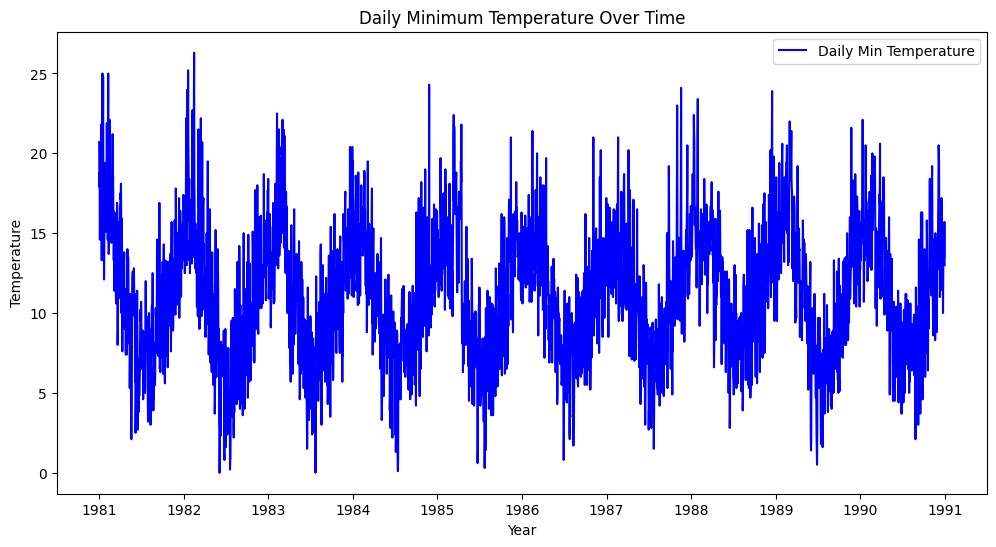

In [5]:
# Plot original time series
plt.figure(figsize=(12,6))
plt.plot(df['Temp'], label="Daily Min Temperature", color='blue')
plt.title("Daily Minimum Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [6]:
#apply moving average smoothing
df['7-Day SMA']=df['Temp'].rolling(window=7).mean()

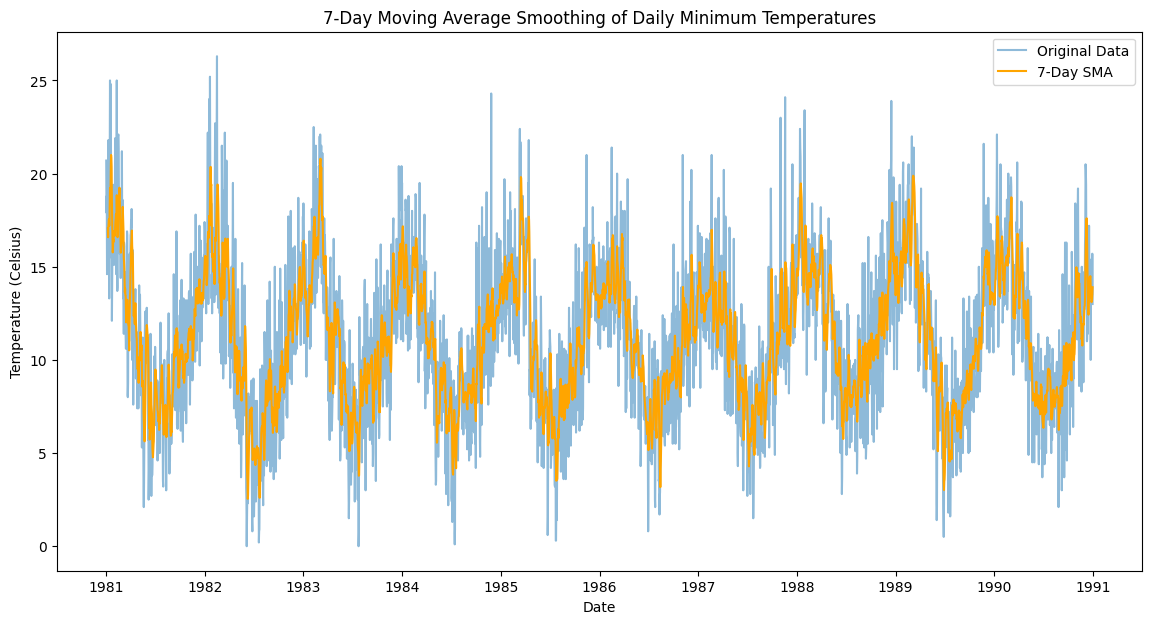

In [7]:
#visualize smoothing
plt.figure(figsize=(14,7))
plt.plot(df['Temp'], label='Original Data', alpha=0.5)
plt.plot(df['7-Day SMA'] ,label='7-Day SMA', color="orange")
plt.title("7-Day Moving Average Smoothing of Daily Minimum Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.show()

In [8]:
# use smoothed data for forecasting
import numpy as np

last_sma=df['7-Day SMA'].iloc[-1]
forecast_dates=pd.date_range(start=df.index[-1]+pd.Timedelta(days=1),periods=7)
forecast= pd.DataFrame({"Forecast":np.repeat(last_sma,7)},index=forecast_dates)

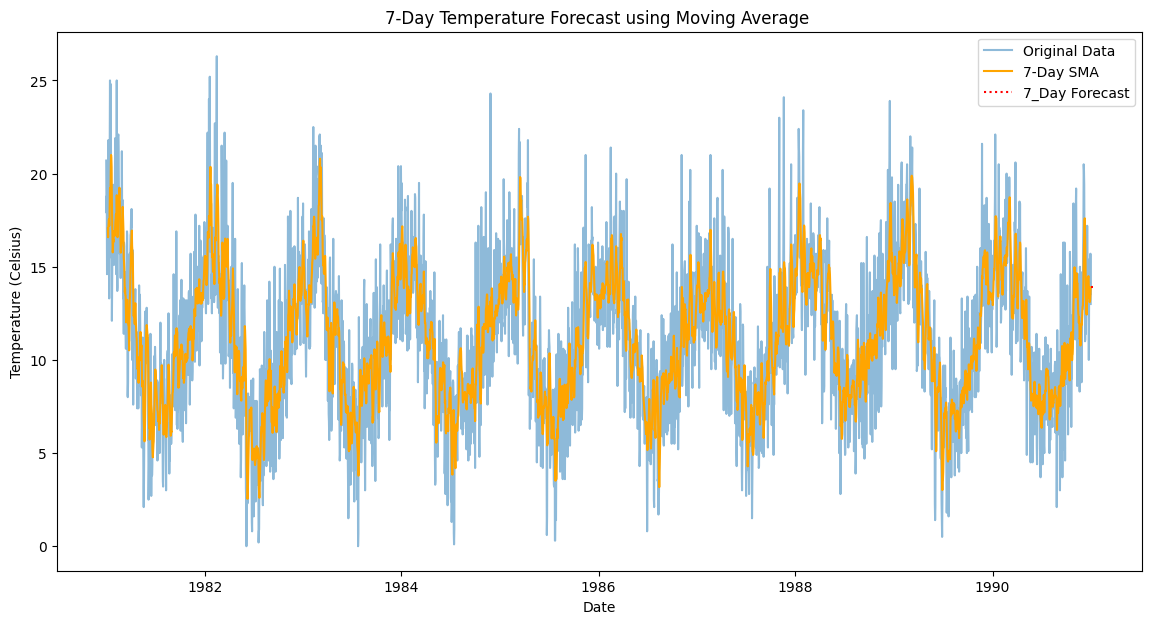

In [9]:
#plot forecast
plt.figure(figsize=(14,7))
plt.plot(df['Temp'],label='Original Data',alpha=0.5)
plt.plot(df['7-Day SMA'],label='7-Day SMA',color='orange')
plt.plot(forecast['Forecast'],label='7_Day Forecast',linestyle=':',color='red')
plt.title("7-Day Temperature Forecast using Moving Average ")
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.show()

In [11]:
# Prepare data for training (Using previous day's SMA for forecasting)
df.dropna(inplace=True)  # Drop missing values caused by moving average

df['Previous_SMA'] = df['7-Day SMA'].shift(1)
df.dropna(inplace=True)

X = df[['Previous_SMA']]
y = df['Temp']

# Split data into training (80%) and testing (20%)
split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [12]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred) * 100  # Convert to percentage
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Model Evaluation Results:")
print(f"R² Score (Accuracy): {r2:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Results:
R² Score (Accuracy): 60.58%
Mean Absolute Error (MAE): 2.02
Root Mean Squared Error (RMSE): 2.58


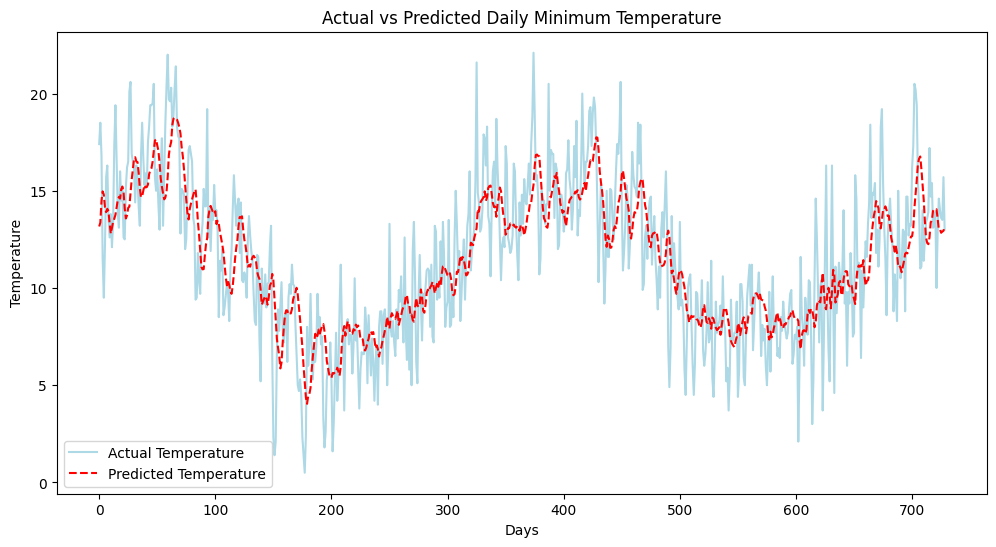

In [14]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Temperature", color='lightblue')
plt.plot(y_pred, label="Predicted Temperature", linestyle='--', color='red')
plt.title("Actual vs Predicted Daily Minimum Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.show()
